Linear Regression with L1 and L2 Regularization

In [1]:

!pip install mglearn

  Using cached mglearn-0.2.0-py2.py3-none-any.whl.metadata (628 bytes)
  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached mglearn-0.2.0-py2.py3-none-any.whl (581 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.4 MB ? eta -:--:--
   -- ------------------------------------- 2.6/38.4 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.4 MB 10.6 MB/s eta 0:00:04
   ------- -------------------------------- 6.8/38.4 MB 1

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import mglearn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

1. Load extended Boston housing dataset

In [7]:
X, y = mglearn.datasets.load_extended_boston()

 2. Split into training and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

3. Linear Regression (OLS)

In [9]:
lr = LinearRegression().fit(X_train, y_train)
print("Linear Regression")
print("Train score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))
print()

Linear Regression
Train score: 0.95
Test score: 0.61



 4. Ridge Regression (L2)

In [10]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [11]:
print("Ridge Regression (alpha=1.0)")
print("Train score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))
print()

Ridge Regression (alpha=1.0)
Train score: 0.89
Test score: 0.75



In [12]:
print("Ridge Regression (alpha=10)")
print("Train score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge10.score(X_test, y_test)))
print()

Ridge Regression (alpha=10)
Train score: 0.79
Test score: 0.64



In [13]:
print("Ridge Regression (alpha=0.1)")
print("Train score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge01.score(X_test, y_test)))
print()



Ridge Regression (alpha=0.1)
Train score: 0.93
Test score: 0.77



5. Lasso Regression (L1)

In [14]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

In [15]:
print("Lasso Regression (alpha=1.0)")
print("Train score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Features used:", np.sum(lasso.coef_ != 0))
print()

Lasso Regression (alpha=1.0)
Train score: 0.29
Test score: 0.21
Features used: 4



In [16]:
print("Lasso Regression (alpha=0.01)")
print("Train score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Features used:", np.sum(lasso001.coef_ != 0))
print()

Lasso Regression (alpha=0.01)
Train score: 0.90
Test score: 0.77
Features used: 33



In [17]:
print("Lasso Regression (alpha=0.0001)")
print("Train score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Features used:", np.sum(lasso00001.coef_ != 0))
print()

Lasso Regression (alpha=0.0001)
Train score: 0.95
Test score: 0.64
Features used: 96



6. Plotting coefficients

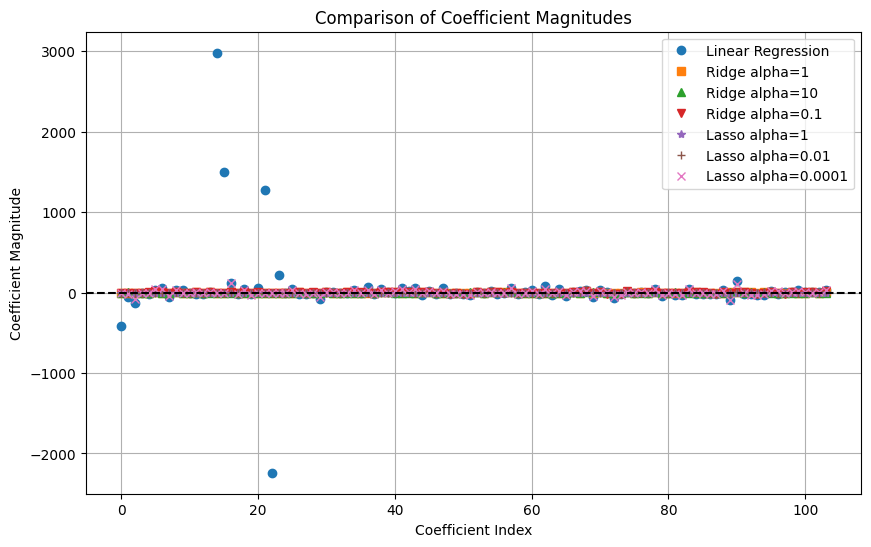

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lasso.coef_, '*', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '+', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'x', label="Lasso alpha=0.0001")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Comparison of Coefficient Magnitudes")
plt.axhline(0, color='black', linestyle='--')
plt.legend(loc='best')
plt.grid(True)
plt.show()